# SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tursu.csv')

In [3]:
df.head()

,Turşu,Limon,Sirke
0,1,14.541182,9.171020
1,1,15.066288,7.708681
2,1,12.784097,9.935294
3,1,11.746347,9.769397
4,0,5.807864,14.875203


## About Data

In [4]:
df.describe()

,Turşu,Limon,Sirke
count,400.000000,400.000000,400.000000
mean,0.500000,11.164130,12.456428
std,0.500626,5.231158,4.203432
min,0.000000,0.620743,2.989299
25%,0.000000,6.262639,8.634345
50%,0.500000,10.711047,12.550953
75%,1.000000,15.995800,16.171148
max,1.000000,20.786109,20.947857


<Axes: xlabel='Limon', ylabel='Sirke'>

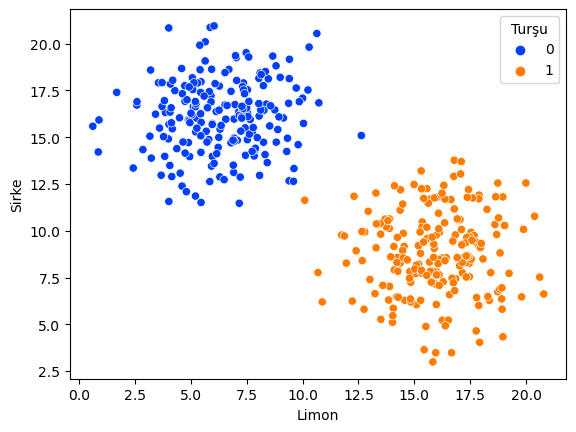

In [5]:
sns.scatterplot(x='Limon',y='Sirke', data=df, hue='Turşu', palette='bright')

## SVM MODEL

In [6]:
X = df.drop('Turşu',axis=1)
y = df['Turşu']

In [7]:
from sklearn.svm import SVC

In [8]:
from svg_margin_plot import plot_svm_boundary

ModuleNotFoundError: No module named 'svg_margin_plot'

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

## Lineer Model 

In [12]:
svc_model = SVC(kernel='linear')

In [13]:
svc_model.fit(X,y)

SVC(kernel='linear')

## C = 1

In [15]:
svc_model.C

1.0

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


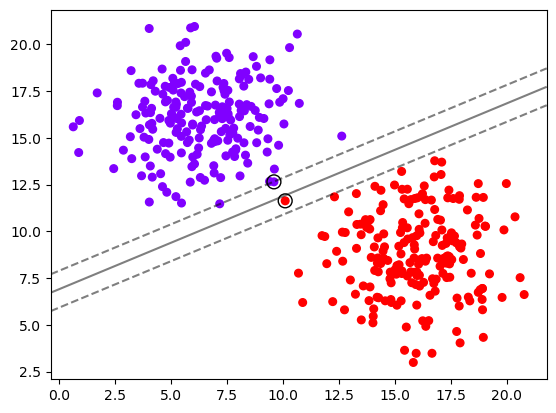

In [18]:
plot_svm_boundary(svc_model, X,y);

In [19]:
svc_model = SVC(kernel='linear', C=800)
svc_model.fit(X,y)

SVC(C=800, kernel='linear')

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


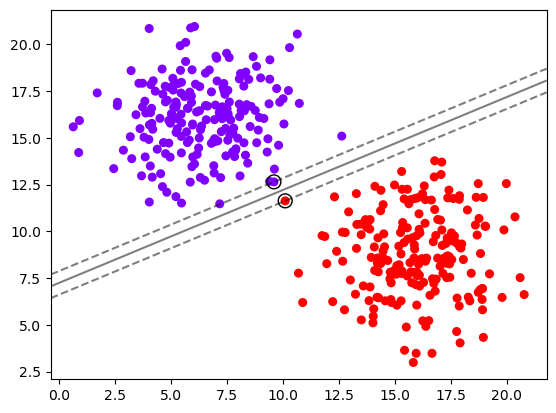

In [20]:
plot_svm_boundary(svc_model, X,y);

In [21]:
svc_model = SVC(kernel='linear', C=0.01)
svc_model.fit(X,y)

SVC(C=0.01, kernel='linear')

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


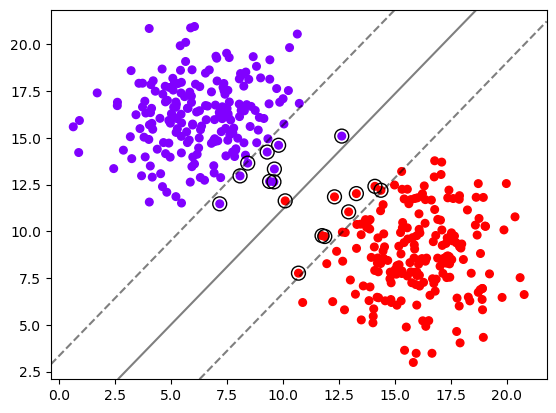

In [22]:
plot_svm_boundary(svc_model, X,y);

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


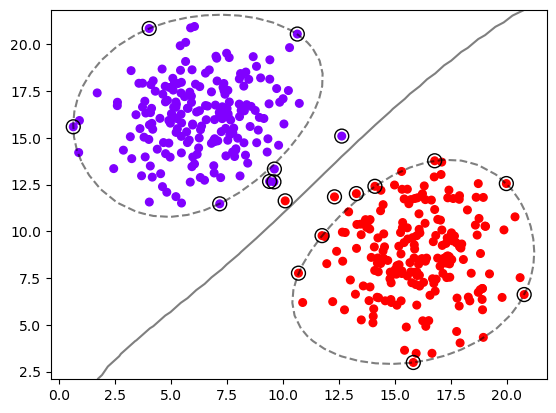

In [23]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X,y)
plot_svm_boundary(svc_model, X,y);

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


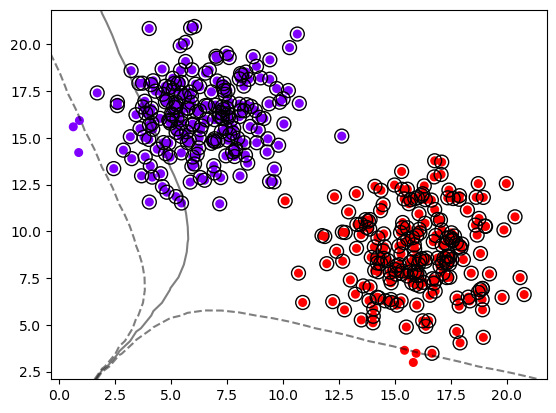

In [24]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X,y)
plot_svm_boundary(svc_model, X,y);

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


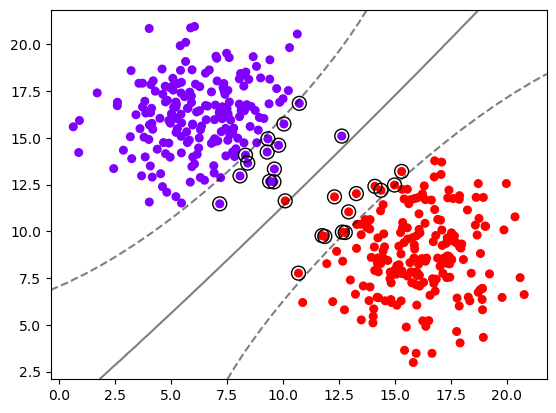

In [25]:
svc_model = SVC(kernel='rbf', gamma=0.003)
svc_model.fit(X,y)
plot_svm_boundary(svc_model, X,y);

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


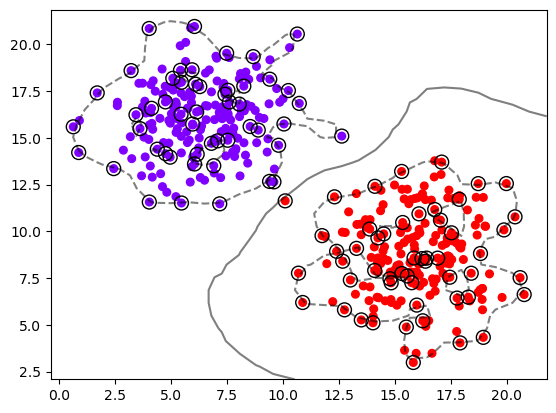

In [27]:
svc_model = SVC(kernel='rbf', gamma=0.3)
svc_model.fit(X,y)
plot_svm_boundary(svc_model, X,y);

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


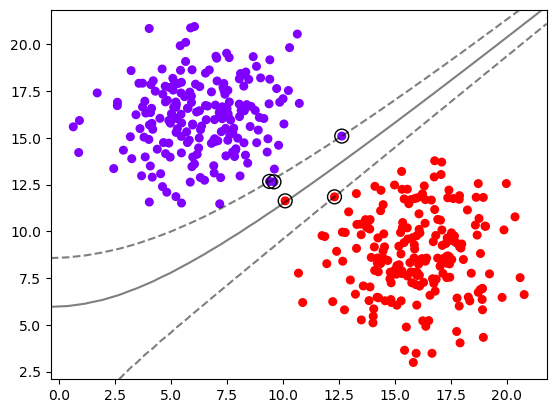

In [30]:
svc_model = SVC(kernel='poly', degree=2)
svc_model.fit(X,y)
plot_svm_boundary(svc_model, X,y);

# Grid Search

In [31]:
from sklearn.model_selection import GridSearchCV

In [34]:
svm = SVC()

C = 10.0 ** np.arange(-4,3)

parameters = {
    'C' : C,
    'kernel' :[ 'rbf', 'linear']
}

In [35]:
grid = GridSearchCV(svm, parameters)

In [36]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['rbf', 'linear']})